# Enron Email Dataset

In this dataset the procedure followed is:
1. Having a glance at the dataset.
2. Reducing the size of the dataset.
3. Analysing the sender.
4. Counting the frequency.
5. Create df with 2 highest emails. 
6. Preprocessing and get ready for machine learning
7. Remove rare words
8. Define X and y
9. Split for training and validating
10. Vectorise
11. Define and train model
12. Predict on validation set
13. Evaluate

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv("emails.csv")
df = df.sample(frac = 1)


In [5]:
df

,file,message
445593,skilling-j/inbox/405.,Message-ID: <26117676.1075840162504.JavaMail.e...
216143,kaminski-v/discussion_threads/3550.,Message-ID: <22871989.1075856414327.JavaMail.e...
118831,fossum-d/sent/1290.,Message-ID: <18381998.1075863618080.JavaMail.e...
185931,jones-t/all_documents/5201.,Message-ID: <3303985.1075847041986.JavaMail.ev...
215361,kaminski-v/discussion_threads/2802.,Message-ID: <1881304.1075856394864.JavaMail.ev...
...,...,...
393897,sanders-r/all_documents/3458.,Message-ID: <17272239.1075860506127.JavaMail.e...
173925,horton-s/sent/85.,Message-ID: <17153895.1075844957344.JavaMail.e...
367491,quigley-d/deleted_items/81.,Message-ID: <1942306.1075841444391.JavaMail.ev...
386926,sager-e/inbox/760.,Message-ID: <7444031.1075861315508.JavaMail.ev...


In [8]:
# Reduce dataset

In [6]:
df = df[: 5200]

In [9]:
df['sender'] = df['file'].str.split('/').str[0]
df['sender']

<ipython-input-9-0321e62d14d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sender'] = df['file'].str.split('/').str[0]


445593      skilling-j
216143      kaminski-v
118831        fossum-d
185931         jones-t
215361      kaminski-v
              ...     
396021       sanders-r
425928    shackleton-s
419970    shackleton-s
116983        fossum-d
406386         scott-s
Name: sender, Length: 5200, dtype: object

In [11]:
# Analyse sender

In [12]:
sender = df.groupby('sender').sender.count()
sender

sender
allen-p        34
arnold-j       50
arora-h         3
badeer-r       12
bailey-s        5
               ..
williams-w3    33
wolfe-j        11
ybarbo-p       20
zipper-a       14
zufferli-j      4
Name: sender, Length: 149, dtype: int64

In [13]:
percent_sender = (sender / len(df)) * 100
percent_sender

sender
allen-p        0.653846
arnold-j       0.961538
arora-h        0.057692
badeer-r       0.230769
bailey-s       0.096154
                 ...   
williams-w3    0.634615
wolfe-j        0.211538
ybarbo-p       0.384615
zipper-a       0.269231
zufferli-j     0.076923
Name: sender, Length: 149, dtype: float64

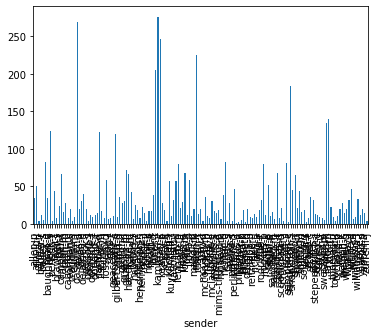

In [14]:
import matplotlib.pyplot as plt

df.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

In [15]:
# Senders

In [16]:
sender = df['sender'].to_list()

# using naive method to remove duplicated from list  
list_sender = [] 
for i in sender: 
    if i not in list_sender: 
        list_sender.append(i)
    
print(len(list_sender))

149


In [17]:
# Count how mant times a sender appears in each column

In [18]:
from collections import Counter

s = df.sender
counts = Counter(s)
print(dict(counts))

{'skilling-j': 43, 'kaminski-v': 276, 'fossum-d': 58, 'jones-t': 205, 'shankman-j': 45, 'whalley-g': 19, 'derrick-j': 20, 'platter-p': 5, 'kean-s': 246, 'hain-m': 42, 'allen-p': 34, 'mann-k': 225, 'lewis-a': 21, 'love-p': 58, 'stclair-c': 35, 'lay-k': 57, 'beck-s': 124, 'ybarbo-p': 20, 'taylor-m': 139, 'dean-c': 30, 'fischer-m': 17, 'quigley-d': 19, 'grigsby-m': 30, 'tholt-j': 22, 'donohoe-t': 9, 'smith-m': 15, 'hyvl-d': 38, 'kitchen-l': 57, 'keiser-k': 18, 'bass-e': 82, 'neal-s': 38, 'guzman-m': 72, 'mcconnell-m': 36, 'sager-e': 51, 'sanders-r': 68, 'arnold-j': 50, 'dorland-c': 11, 'rogers-b': 80, 'symes-k': 134, 'parks-j': 27, 'germany-c': 119, 'shackleton-s': 184, 'storey-g': 9, 'lokay-m': 68, 'campbell-l': 66, 'giron-d': 36, 'panus-s': 4, 'linder-e': 29, 'keavey-p': 27, 'mckay-b': 10, 'scott-s': 81, 'farmer-d': 122, 'carson-m': 16, 'dasovich-j': 269, 'white-s': 46, 'nemec-g': 82, 'baughman-d': 34, 'donoho-l': 12, 'solberg-g': 18, 'sanchez-m': 6, 'blair-l': 44, 'zipper-a': 14, 'lenh

In [19]:
send_df = pd.DataFrame.from_dict(counts, orient='index').reset_index().sort_values(0, ascending=False)
send_df = send_df.rename(columns={'index':'sender', 0:'count'})
send_df

,sender,count
1,kaminski-v,276
53,dasovich-j,269
8,kean-s,246
11,mann-k,225
3,jones-t,205
...,...,...
125,south-s,2
131,quenet-j,2
147,pimenov-v,2
148,semperger-c,2


In [20]:
# Create df with two highest emails

In [21]:
name1 = send_df.iloc[0]
name2 = send_df.iloc[1]

print(name1)
print("")
print(name2)

sender    kaminski-v
count            276
Name: 1, dtype: object

sender    dasovich-j
count            269
Name: 53, dtype: object


In [22]:
name_a = name1[0]
name_b = name2[0]

print(name_a)
print("")
print(name_b)

kaminski-v

dasovich-j


In [23]:
include_email_1 = df[df['sender'].values == name_a] 
include_email_2 = df[df['sender'].values == name_b]
include_email = include_email_1.append(include_email_2)
include_email

,file,message,sender
216143,kaminski-v/discussion_threads/3550.,Message-ID: <22871989.1075856414327.JavaMail.e...,kaminski-v
215361,kaminski-v/discussion_threads/2802.,Message-ID: <1881304.1075856394864.JavaMail.ev...,kaminski-v
212809,kaminski-v/deleted_items/2473.,Message-ID: <5079441.1075863412096.JavaMail.ev...,kaminski-v
201267,kaminski-v/_sent_mail/4351.,Message-ID: <317575.1075856996808.JavaMail.eva...,kaminski-v
207167,kaminski-v/all_documents/4827.,Message-ID: <4950726.1075856301312.JavaMail.ev...,kaminski-v
...,...,...,...
78053,dasovich-j/notes_inbox/945.,Message-ID: <1672549.1075843122841.JavaMail.ev...,dasovich-j
58400,dasovich-j/all_documents/12753.,Message-ID: <8820773.1075843507749.JavaMail.ev...,dasovich-j
80105,dasovich-j/sent/1197.,Message-ID: <22048154.1075843212965.JavaMail.e...,dasovich-j
70137,dasovich-j/inbox/585.,Message-ID: <2007772.1075851656981.JavaMail.ev...,dasovich-j


In [24]:
# Label encoder

In [25]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

include_email.sender = le.fit_transform(include_email.sender)
include_email

,file,message,sender
216143,kaminski-v/discussion_threads/3550.,Message-ID: <22871989.1075856414327.JavaMail.e...,1
215361,kaminski-v/discussion_threads/2802.,Message-ID: <1881304.1075856394864.JavaMail.ev...,1
212809,kaminski-v/deleted_items/2473.,Message-ID: <5079441.1075863412096.JavaMail.ev...,1
201267,kaminski-v/_sent_mail/4351.,Message-ID: <317575.1075856996808.JavaMail.eva...,1
207167,kaminski-v/all_documents/4827.,Message-ID: <4950726.1075856301312.JavaMail.ev...,1
...,...,...,...
78053,dasovich-j/notes_inbox/945.,Message-ID: <1672549.1075843122841.JavaMail.ev...,0
58400,dasovich-j/all_documents/12753.,Message-ID: <8820773.1075843507749.JavaMail.ev...,0
80105,dasovich-j/sent/1197.,Message-ID: <22048154.1075843212965.JavaMail.e...,0
70137,dasovich-j/inbox/585.,Message-ID: <2007772.1075851656981.JavaMail.ev...,0


In [26]:
# Analyse

In [27]:
include_email['sender'].value_counts()

1    276
0    269
Name: sender, dtype: int64

In [28]:
percentage_email=(include_email.sender.value_counts() / len(include_email.sender)) * 100
percentage_email

1    50.642202
0    49.357798
Name: sender, dtype: float64

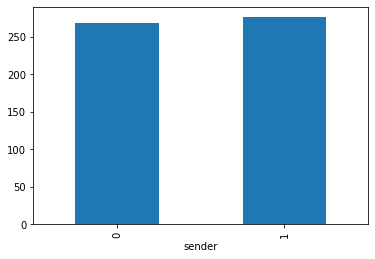

In [29]:
include_email.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

In [30]:
# Preprocessing and get ready for machine learning

In [31]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = stopwords.words("english")

include_email['processed_text'] = include_email['message'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [32]:
import string

#make all words lower case
include_email['processed_text'] = include_email['processed_text'].str.lower()

#Remove punctuation
#table = str.maketrans('', '', string.punctuation)
#include_email['processed_text'] = [include_email['processed_text'][row].translate(table) for row in range(len(include_email['processed_text']))]

# remove hash tags
include_email['processed_text'] = include_email['processed_text'].str.replace("#", " ")

#remove words less than 1 character
include_email['processed_text'] = include_email['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [33]:
# Remove rare words

In [34]:
from collections import Counter
from itertools import chain

# split words into lists
v = include_email['processed_text'].str.split().tolist() 
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
include_email['processed_text'] = [' '.join([j for j in i if c[j] > 1]) for i in v]

In [35]:
# Define X and y

In [36]:
#define x, y and t_test
y = include_email.sender
X = include_email['processed_text']

In [37]:
# Split for training and validating

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.10, random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((490,), (490,), (55,), (55,))

In [39]:
# Vectorise

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))
val_tfIdf = vectorizer_tfidf.transform(X_val.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:5])

['aagraw', 'aaldou', 'aamirali', 'aandi', 'aaron']


In [41]:
train_tfIdf.shape,  val_tfIdf.shape

((490, 8341), (55, 8341))

In [42]:
# Define and train model

In [43]:
from sklearn.naive_bayes import ComplementNB

model=ComplementNB().fit(train_tfIdf, y_train)

print(model.score(train_tfIdf, y_train))

0.9979591836734694


In [44]:
# Predict on validation set

In [45]:
y_pred = model.predict(val_tfIdf)
print(model.score(val_tfIdf, y_val))

0.9636363636363636


In [46]:
df = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
220801,1,1
64439,0,0
213023,1,1
80097,0,0
209869,1,1
201835,1,1
76609,0,1
56289,0,0
205886,1,1
221776,1,1


In [47]:
# Evaluate

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[26,  1],
       [ 1, 27]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        28

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55



In [ ]:
# hence we can see that the accuracy we scored is overall good and above 95% and has no problem with precision and our model is ready. 